# __Latar Belakang__

Dalam manajemen sistem transportasi publik, BUMD PT Transjakarta ingin meningkatkan kinerja operasional dan layanan bagi penumpangnya, sehingga pemahaman yang mendalam tentang operasional dan kondisi di lapangan sangat penting untuk memastikan efisiensi dan efektivitas layanan guna meningkatkan kepuasan bagi penumpangnya. Dengan mengumpulkan data perjalanan layanan Transjakarta dalam kurun waktu tertentu tim operasional kantor dapat melakukan analisis yang mendalam untuk mengambil keputusan yang berbasis data.

---

# __Pernyataan Masalah__

Perusahaan ingin mengetahui kinerja setiap rute untuk mengidentifikasi faktor-faktor yang memengaruhi keefisienan layanan, yang mungkin memerlukan perbaikan, dan untuk mengoptimalkan penggunaan sumber daya kepuasan penumpang. Pemantauan kinerja rute, waktu tempuh, perilaku dan karakteristik penumpang adalah kunci untuk menyediakan layanan yang memenuhi kebutuhan penumpang dan meningkatkan kepuasan penumpang. Sehingga diangkatlah permasalah berikut untuk dianalisis.

`Bagaimana karakteristik penumpang dan rute perjalanan dari layanan Transjakarta?`

---

# __Data__

#### _1. Import Library_

In [54]:
# Pengolahan Data
import numpy as np
import pandas as pd

# Visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# statistics
import statsmodels.api as sm
from scipy.stats import normaltest, chi2_contingency, kruskal, spearmanr

import warnings
warnings.filterwarnings("ignore")

#### _2. Read Data_

Untuk menjawab pertanyaan sebelumnya, dapat dilihat dari karakteristik dari penumpang dan keefisienan rute: frekuensi penumpang dan kecocokan layanan dengan kebutuhan penumpang. Dalam proses analisisnya, digunakan dataset Transjakarta yang telah dilakukan _cleaning_. Maka step pertama yang dilakukan adalah import dataset `Transjakarta(clean).csv`.

In [55]:
df = pd.read_csv('Transjakarta(clean).csv', parse_dates=['TapIn_Time', 'TapOut_Time'])
print('Jumlah baris dan kolom:', df.shape)

Jumlah baris dan kolom: (36472, 22)


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36472 entries, 0 to 36471
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   TransID       36472 non-null  object        
 1   CardID        36472 non-null  int64         
 2   PayCardBank   36472 non-null  object        
 3   Name          36472 non-null  object        
 4   Gender        36472 non-null  object        
 5   BirthYear     36472 non-null  int64         
 6   CorridorID    36472 non-null  object        
 7   CorridorName  36472 non-null  object        
 8   Direction     36472 non-null  float64       
 9   TapIn_ID      36472 non-null  object        
 10  TapIn_Name    36472 non-null  object        
 11  TapIn_Lat     36472 non-null  float64       
 12  TapIn_Lon     36472 non-null  float64       
 13  TapIn_Seq     36472 non-null  int64         
 14  TapIn_Time    36472 non-null  datetime64[ns]
 15  TapOut_ID     36472 non-null  object

Dataset di atas berisikan informasi penumpang, berdasarkan data yang tertanam di metode pembayaran, yang melakukan perjalanan menggunakan layanan Transjakarta. Dataset ini terdiri dari 36.472 baris dan 22 kolom. Deskripsi setiap kolom akan dijelaskan pada tabel beirkut.

No. | Nama Kolom | Dtype | Deskripsi |
| --- | --- | --- | --- |
1 |TransID| `object` | ID Transaksi yang __unik__ di setiap transaksi
2 |CardID| `int64` |Pengidentifikasi utama penumpang. Kartu tersebut digunakan penumpang sebagai tiket masuk dan keluar.
3 |PayCardBank| `object` | __Nama bank__ penerbit kartu penumpang
4 |Name| `object` | __Nama Customer__ yang tercantum di kartu.
5 |Gender| `object` | __Jenis kelamin Customer__ yang tercantum di kartu.
6 |BirthYear| `int64` | __Tahun lahir Customer__ yang tercantum di kartu.
7 |CorridorID| `object` | ID Koridor / __ID Rute__ sebagai kunci pengelompokan rute.
8 |CorridorName| `object` | Nama Koridor / __Nama Rute__ berisi __'awal'__ dan __'akhir'__ untuk setiap rute.
9 |Direction| `float64` | __Arah rute__. __0__ untuk arah __'Pergi'__, __1__ untuk arah __'Kembali'__. 
10 |TapIn_ID| `object` | __ID Pintu Masuk__ (perhentian masuk), untuk mengidentifikasi nama perhentian.
11 |TapIn_Name| `object` | __Nama pintu masuk__ tempat penumpang _tap-in_ kartu.
12 |TapIn_Lat| `float64` | __Garis Lintang__ _tap-in_ kartu di pintu masuk
13 |TapIn_Lon| `float64` | __Garis Bujur__ _tap-in_ kartu di pintu masuk
14 |TapIn_Seq| `int64` | __Urutan pemberhentian__, pemberhentian pertama, pemberhentian kedua, dst. Terkait dengan arah.
15 |TapIn_Time| `datetime64[ns]` | __Waktu__ ketika penumpang masuk (_tap-in_ kartu). __Tanggal dan detail waktu__.
16 |TapOut_ID| `object` | __ID Pintu Keluar__ (perhentian keluar), untuk mengidentifikasi nama perhentian
17 |TapOut_Name| `object` | __Nama pintu keluar__ tempat penumpang _tap-out_ kartu.
18 |TapOut_Lat| `float64` | __Garis Lintang__ _tap-out_ kartu di pintu masuk
19 |TapOut_Lon| `float64` | __Garis Bujur__ _tap-out_ kartu di pintu masuk
20 |TapOut_Seq| `float64` | __Urutan pemberhentian__, pemberhentian pertama, pemberhentian kedua, dst. Terkait dengan arah.
21 |TapOut_Time| `datetime64[ns]` | __Waktu__ ketika penumpang keluar (_tap-out_ kartu). __Tanggal dan detail waktu__.
22 |PayAmount| `float64` | __Jumlah uang yang dibayar__ penumpang. Beberapa gratis. Beberapa tidak.

#### 3. Cek _Missing Value_ dan Duplikasi Data

In [57]:
print('Jumlah duplikasi data:', df.duplicated().sum())

Jumlah duplikasi data: 0


In [58]:
df.isna().sum()

TransID         0
CardID          0
PayCardBank     0
Name            0
Gender          0
BirthYear       0
CorridorID      0
CorridorName    0
Direction       0
TapIn_ID        0
TapIn_Name      0
TapIn_Lat       0
TapIn_Lon       0
TapIn_Seq       0
TapIn_Time      0
TapOut_ID       0
TapOut_Name     0
TapOut_Lat      0
TapOut_Lon      0
TapOut_Seq      0
TapOut_Time     0
PayAmount       0
dtype: int64

Langkah di atas dilakukan untuk memastikan tidak ada missing value dan duplikasi data dari dataset. Detail lebih lanjut setiap kolom akan dijelaskan pada DataFrame berikut.

#### 4. Sampel Data

In [59]:
pd.set_option('display.max_colwidth', 200)

# data unik di tiap kolom
listkolom= []
for col in df.columns:
    listkolom.append( [col, df[col].nunique(), df[col].unique()] )

TabelDeskripsi = pd.DataFrame(columns=['Nama Kolom', 'Jumlah Nilai Unik', 'Sampel'], data=listkolom)
display(TabelDeskripsi)

,Nama Kolom,Jumlah Nilai Unik,Sampel
0,TransID,36472,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XES..."
1,CardID,1983,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759..."
2,PayCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,Name,1976,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh La..."
4,Gender,2,"[M, F]"
5,BirthYear,67,"[2008, 1997, 1992, 1978, 1982, 1993, 1991, 2004, 1984, 1988, 2002, 1975, 2011, 2003, 1981, 2009, 1983, 1999, 2007, 1979, 1960, 2001, 1990, 1968, 1985, 2010, 1989, 2006, 1986, 1965, 2005, 1966, 199..."
6,CorridorID,221,"[5, 6C, R1A, 11D, 12, 1T, JAK.03, B14, 1Q, 5M, M7B, 9A, 4, JAK.46, S22, 13, 9E, M9, JAK.88, T11, JAK.16, 6V, 11Q, JAK.02, 11, 1C, 3B, M1, 7E, 1P, 7D, 6H, 14, BW9, JIS3, 2, JAK.15, 6N, M11, JAK.112..."
7,CorridorName,221,"[Matraman Baru - Ancol, Stasiun Tebet - Karet via Patra Kuningan, Pantai Maju - Kota, Pulo Gebang - Pulo Gadung 2 via PIK, Tanjung Priok - Pluit, Cibubur - Balai Kota, Lebak Bulus - Andara, Bekasi..."
8,Direction,2,"[1.0, 0.0]"
9,TapIn_ID,2536,"[P00142, B01963P, B00499P, B05587P, P00239, B00127P, B03416P, B00795P, B05781P, B05433P, P00254, P00281, P00159, B00608P, B05291P, P00096, B00058P, P00093, B00722P, P00206, B02144P, P00259, B02335..."


Dari 36.472 baris, kolom `TransID` memiliki nilai unik sebanyak 36.472. Artinya setiap barisnya merupakan transaksi yang berbeda. Karena nilainya acak, kolom tersebut akan di-_exclusive_-kan dari analisis, dengan tujuan lain agar memudah dalam menampilkan DataFrame(df).

Selanjutnya karena pembayaran hanya dikategorikan menjadi 3 (Rp0, Rp3.500, Rp20.000), maka tipe kolomnya akan diubah menjadi integer.

In [60]:
df.drop(columns='TransID', inplace=True)
df['PayAmount'] = df['PayAmount'].astype(int)

Berikut 5 baris pertama dan terakhir dari dataset Transjakarta.

In [61]:
# 5 baris pertama dan terakhir dataset Transjakarta (clean)
pd.set_option('display.max_columns', None)
display(df.head(), df.tail())

,CardID,PayCardBank,Name,Gender,BirthYear,CorridorID,CorridorName,Direction,TapIn_ID,TapIn_Name,TapIn_Lat,TapIn_Lon,TapIn_Seq,TapIn_Time,TapOut_ID,TapOut_Name,TapOut_Lat,TapOut_Lon,TapOut_Seq,TapOut_Time,PayAmount
0,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500
1,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500
2,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500
3,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500
4,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500


,CardID,PayCardBank,Name,Gender,BirthYear,CorridorID,CorridorName,Direction,TapIn_ID,TapIn_Name,TapIn_Lat,TapIn_Lon,TapIn_Seq,TapIn_Time,TapOut_ID,TapOut_Name,TapOut_Lat,TapOut_Lon,TapOut_Seq,TapOut_Time,PayAmount
36467,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500
36468,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500
36469,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000
36470,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0
36471,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,Adam Malik,-6.236466,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500


---

# __Analisis Data__

### __1. Ringkasan Statistik__

In [62]:
display(df.describe().iloc[:, [1, 6, 10, 11]], df.describe(include='object'))

,BirthYear,TapIn_Time,TapOut_Time,PayAmount
count,36472.000000,36472,36472,36472.000000
mean,1990.125631,2023-04-16 07:56:04.695574528,2023-04-16 09:08:12.467619072,2686.718579
min,1946.000000,2023-04-01 06:22:27,2023-04-01 07:27:31,0.000000
25%,1982.000000,2023-04-10 09:02:15,2023-04-10 10:16:58,0.000000
50%,1990.000000,2023-04-16 17:39:17,2023-04-16 19:00:00,3500.000000
75%,2001.000000,2023-04-21 21:36:27,2023-04-21 23:02:22.750000128,3500.000000
max,2012.000000,2023-04-30 21:55:41,2023-04-30 23:23:18,20000.000000
std,13.041574,NaN,NaN,4172.934431


,PayCardBank,Name,Gender,CorridorID,CorridorName,TapIn_ID,TapIn_Name,TapOut_ID,TapOut_Name
count,36472,36472,36472,36472,36472,36472,36472,36472,36472
unique,6,1976,2,221,221,2536,2536,2221,2221
top,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,P00016,BKN
freq,18017,78,19416,394,394,235,235,315,315


Dari ringkasan dataset Transjakarta bulan April tahun 2023 di atas diketahui bahwa
- _Customer_ paling muda berumur 11 tahun (Kelahiran 2012) dan yang paling tua berumur 77 tahun (Kelahiran 1946);
- Biaya yang dikeluarkan customer paling tinggi adalah Rp20.000 dan ada customer yang tidak dikenakan biaya;
- Kartu yang paling banyak digunakan untuk pembayaran layanan adalah bank dki, hal ini wajar karena Transjakarta merupakan layanan bus di Jakarta yang notabene penumpangnya adalah warga DKI Jakarta;
- Customer yang banyak menggunakan layanan Transjakarta adalah Fathonah Saefullah sebanyak 78 kali selama bulan April;
- Gender yang paling banyak menggunakan layanan Transjakarta adalah perempuan, namun yang menjadi pertanyaan selanjutnya adalah 'apakah jumlah perbedaan gender di sini cukup tinggi?';
- Rute/jalur yang paling padat adalah CorridorID 1T (Cibubur - Balai Kota); dan
- Halte yang paling padat berada di TapOut_ID: P00016 (BKN).

---

### __2. Analisis Rute__

Untuk mengecek kinerja dari setiap rute, dapat dilihat dari frekuensinya, distribusi waktu perjalanan, durasi perjalanan, dan analisis TapIn & TapOut.

##### A. Frekuensi Penggunaan

In [63]:
A = set(df[df['Direction']==0]['CorridorID'].unique())
B = set(df[df['Direction']==1]['CorridorID'].unique())
print('Jumlah Rute Transjakarta:', df['CorridorID'].nunique())
print('Jumlah Rute yang memiliki arah Pergi (0.0) dan Kembali (1.0):', len(A.intersection(B)))

Jumlah Rute Transjakarta: 221
Jumlah Rute yang memiliki arah Pergi (0.0) dan Kembali (1.0): 221


> Semua Rute memiliki arah untuk Pergi (0.0) dan Kembali (1.0)

In [64]:
X = df.groupby(['CorridorID'], as_index=False)['CorridorName'].value_counts()
X.columns = ['CorridorID', 'CorridorName', 'Frekuensi']
X.sort_values('Frekuensi', ascending=False, inplace=True, ignore_index=True)
X

,CorridorID,CorridorName,Frekuensi
0,1T,Cibubur - Balai Kota,394
1,S21,Ciputat - CSW,384
2,JIS3,Harmoni - Jakarta International Stadium,343
3,JAK.06,Kampung Rambutan - Pondok Gede,335
4,11P,Rusun Pondok Bambu - Walikota Jakarta Timur,329
...,...,...,...
216,1R,Senen - Tanah Abang,38
217,JAK.99,Term. Pulo Gadung - Lampiri,31
218,JAK.12,Tanah Abang - Kebayoran Lama via Pos Pengumben,22
219,7B,Kampung Rambutan - Blok M,17


In [65]:
# Fungsi untuk menghilangkan garis tepi atas dan kanan
def despine(ax):
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False) 
    return ax

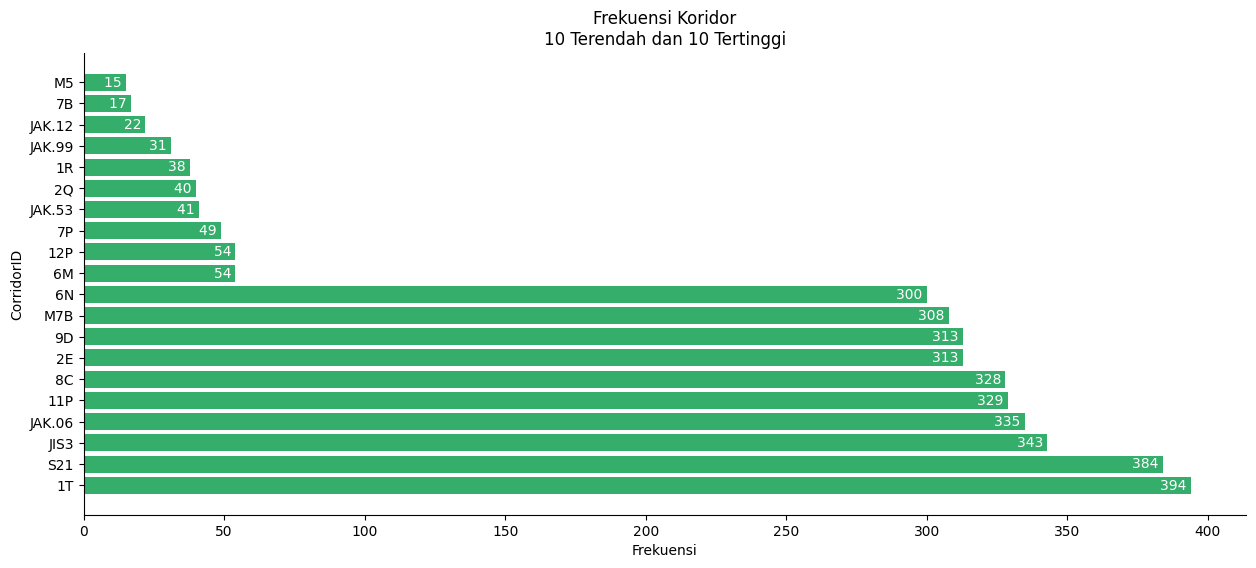

In [66]:
frequency_per_corridor = pd.concat([X.head(10), X.tail(10)])
frequency_per_corridor

fig, ax = plt.subplots(figsize=(15, 6))
ax.barh(frequency_per_corridor['CorridorID'], frequency_per_corridor['Frekuensi'], color='#35AD6B')
ax.set(
    xlabel='Frekuensi',
    ylabel='CorridorID',
    title='Frekuensi Koridor\n10 Terendah dan 10 Tertinggi'
)

for bar in ax.patches:
    x, y = bar.get_xy()
    ax.text(
        x + bar.get_width(), y + bar.get_height()/2, f'{bar.get_width():,d} ',
        va='center', ha='right', color='white'
    )

despine(ax)
plt.show()

In [67]:
df[df['CorridorID']=='JIS3']

,CardID,PayCardBank,Name,Gender,BirthYear,CorridorID,CorridorName,Direction,TapIn_ID,TapIn_Name,TapIn_Lat,TapIn_Lon,TapIn_Seq,TapIn_Time,TapOut_ID,TapOut_Name,TapOut_Lat,TapOut_Lon,TapOut_Seq,TapOut_Time,PayAmount
35,639040388584,flazz,"Galang Megantara, S.Ked",M,1989,JIS3,Harmoni - Jakarta International Stadium,0.0,P00114,Kemayoran Landas Pacu Timur,-6.152181,106.85424,9,2023-04-03 06:32:51,P00161,Pecenongan,-6.167710,106.828190,12.0,2023-04-03 07:20:21,3500
110,3528988342978833,dki,Narji Waskita,M,1985,JIS3,Harmoni - Jakarta International Stadium,1.0,B04789P,Simpang Danau Sunter Utara Barat,-6.139853,106.85663,11,2023-04-03 06:55:00,B01745P,Jembatan Item,-6.130078,106.854920,13.0,2023-04-03 07:43:33,3500
178,213127195148501,emoney,Viktor Zulkarnain,M,1987,JIS3,Harmoni - Jakarta International Stadium,1.0,P00161,Pecenongan,-6.167710,106.82819,6,2023-04-03 05:53:21,B05550P,Sunter Icon,-6.135417,106.855890,12.0,2023-04-03 06:44:46,3500
322,639040388584,flazz,"Galang Megantara, S.Ked",M,1989,JIS3,Harmoni - Jakarta International Stadium,1.0,B04789P,Simpang Danau Sunter Utara Barat,-6.139853,106.85663,11,2023-04-03 16:47:21,B01745P,Jembatan Item,-6.130078,106.854920,13.0,2023-04-03 18:44:46,3500
395,3528988342978833,dki,Narji Waskita,M,1985,JIS3,Harmoni - Jakarta International Stadium,0.0,P00095,JIS,-6.126689,106.85587,0,2023-04-03 16:51:41,P00097,Juanda,-6.168048,106.830890,11.0,2023-04-03 18:01:20,3500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35581,30375353002744,bni,Drs. Gaman Hidayanto,M,1992,JIS3,Harmoni - Jakarta International Stadium,1.0,B04789P,Simpang Danau Sunter Utara Barat,-6.139853,106.85663,11,2023-04-18 08:28:44,P00095,JIS,-6.126689,106.855870,14.0,2023-04-18 08:58:54,3500
35777,30375353002744,bni,Drs. Gaman Hidayanto,M,1992,JIS3,Harmoni - Jakarta International Stadium,0.0,P00148,Pasar Baru Timur,-6.162272,106.83811,10,2023-04-18 18:54:16,P00291,Harmoni Arah Utara,-6.162678,106.819663,13.0,2023-04-18 20:46:18,3500
35972,30375353002744,bni,Drs. Gaman Hidayanto,M,1992,JIS3,Harmoni - Jakarta International Stadium,1.0,B04789P,Simpang Danau Sunter Utara Barat,-6.139853,106.85663,11,2023-04-19 11:22:14,P00095,JIS,-6.126689,106.855870,14.0,2023-04-19 12:19:57,3500
36166,30375353002744,bni,Drs. Gaman Hidayanto,M,1992,JIS3,Harmoni - Jakarta International Stadium,0.0,P00148,Pasar Baru Timur,-6.162272,106.83811,10,2023-04-19 18:29:37,P00291,Harmoni Arah Utara,-6.162678,106.819663,13.0,2023-04-19 20:10:56,3500


Dari grafik barchart di atas, terlihat jelas terdapat perbedaan frekuensi yang muncul di dataset cukup tinggi antara `CorridorID` 1T dengan M5. Tetapi apakah mereka cukup padat sampai perlu ditambah fasilitasnya atau terlalu sepi penumpang sampai perlu melakukan _merge corridor_? maka perlu ditelusuri lebih detail per `CorridorID`. 

In [68]:
all_corrid = list(X['CorridorID'].unique())

max_penumpang = []
for id in all_corrid:
    max_penumpang.append(df[df['CorridorID']==id]['Name'].nunique())

In [69]:
kepadatan = pd.DataFrame({
    'CorridorID':X['CorridorID'],
    'CorridorName': X['CorridorName'],
    'Frekuensi': X['Frekuensi'],
    'Jumlah Penumpang Maks.': max_penumpang,
})
kepadatan.sort_values('Jumlah Penumpang Maks.', ascending=False)

,CorridorID,CorridorName,Frekuensi,Jumlah Penumpang Maks.
1,S21,Ciputat - CSW,384,32
52,JAK.02,Kampung Melayu - Duren Sawit,216,28
137,JAK.120,JIS - Terminal Muara Angke,139,28
16,JAK.58,Cilincing - Rorotan,270,28
86,JAK.71,Kampung Rambutan - Pinang Ranti,180,27
...,...,...,...,...
105,11M,Rusun Rawa Bebek - Bukit Duri,164,10
204,9,Pinang Ranti - Pluit,61,10
218,JAK.12,Tanah Abang - Kebayoran Lama via Pos Pengumben,22,10
207,M2,Pulo Gadung - Monas (M2),59,9


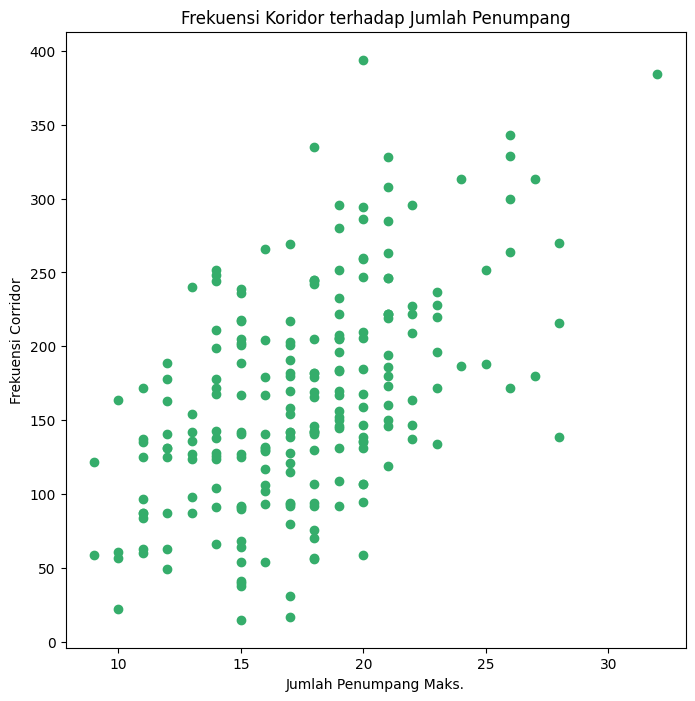

In [70]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(data=kepadatan, x='Jumlah Penumpang Maks.', y='Frekuensi', color='#35AD6B')
ax.set(
    title='Frekuensi Koridor terhadap Jumlah Penumpang',
    xlabel='Jumlah Penumpang Maks.',
    ylabel='Frekuensi Corridor'
)
plt.show()

In [71]:
from scipy.stats import normaltest
def normat_test(data, kolom):
    stat, pvalue = normaltest(data[kolom])
    alpha = 0.05

    if pvalue > alpha:
        print(f'pvalue = {pvalue:.5f}. pvalue > {alpha}. Fail to Reject H0. Kita mengasumsikan bahwa data terdistribusi normal')
    else:
        print(f'pvalue = {pvalue:.5f}. pvalue <= {alpha}. Reject H0. Kita mengasumsikan bahwa data TIDAK terdistribusi normal')

for kolom in ['Jumlah Penumpang Maks.', 'Frekuensi']:
    print(f'Kolom : {kolom}')
    normat_test(kepadatan, kolom)

Kolom : Jumlah Penumpang Maks.
pvalue = 0.02677. pvalue <= 0.05. Reject H0. Kita mengasumsikan bahwa data TIDAK terdistribusi normal
Kolom : Frekuensi
pvalue = 0.03230. pvalue <= 0.05. Reject H0. Kita mengasumsikan bahwa data TIDAK terdistribusi normal


In [72]:
r, pvalue = spearmanr(kepadatan['Jumlah Penumpang Maks.'], kepadatan['Frekuensi'])
print('Nilai p-value     :', pvalue)
print('Koefisien korelasi:', r)

Nilai p-value     : 6.96312028878276e-16
Koefisien korelasi: 0.5077299994643993


Tentu saja dengan jumlah penumpang yang semakin banyak frekuensi Corridor semakin banyak. Karena p-value sangat rendah (6.9631e-16) kita tahu bahwa ada korelasi antar frekuensi Corridor dengan jumlah penumpang maksimal dan didapat nilai koefisien korelasi sebesar 0.5077 yang artinya tingkat _collinearity_-nya ___moderate_/menengah__.

Secara garis besar tingkat kepadatan dapat dilihat dari jumlah penumpang maksimal dari suatu koridor. Berdasarkan website resmi Transjakarta kapasitas penumpang layanan Transjakarta adalah 30 orang untuk bus reguler, 60 orang untuk bus gandeng, 20 orang untuk layanan Royaltrans, 9-11 orang untuk layanan mikrotrans Jaklingko (CorridorID yang berawalan `JAK...`). Karena setiap koridor terbagi dalam 2 arah (0.0 dan 1.0), jam operasi dari jam 05:00 sampai 22:00, jumlah armada lebih dari 1, dan memiliki banyak halte pemberhentian, maka jumlah penumpang maksimal dalam 1 perjalanan akan jarang ditemukan. Walaupun begitu di dalam dataset Transjakarta bulan April jumlah penumpang maksimal yang paling banyak berada pada CorridorID: `S21`, dengan jumlah penumpang 32, diikuti oleh `JAK.02` (28 penumpang), `JAK.120` (28 penumpang), `JAK.58` (28 penumpang), dst. Sehingga yang menjadi perhatian selanjutnya adalah layanan Jaklingko, observasi ke tingkat lebih dalam berdasarkan waktu perjalanan penumpang (ketika _TapIn_ dan _TapOut_) diperlukan karena jumlah maksimal penumpang pada layanan Jaklingko sudah 'diluar kapasitas'-nya.

##### B. Waktu Perjalanan

In [73]:
# Membuat kolom baru Durasi Perjalanan (menit)
df['Durasi Perjalanan (menit)'] = df['TapOut_Time'] - df['TapIn_Time']
df['Durasi Perjalanan (menit)'] = round(df['Durasi Perjalanan (menit)'].dt.total_seconds() / 60, 2)
df.head(1)

,CardID,PayCardBank,Name,Gender,BirthYear,CorridorID,CorridorName,Direction,TapIn_ID,TapIn_Name,TapIn_Lat,TapIn_Lon,TapIn_Seq,TapIn_Time,TapOut_ID,TapOut_Name,TapOut_Lat,TapOut_Lon,TapOut_Seq,TapOut_Time,PayAmount,Durasi Perjalanan (menit)
0,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500,39.15


In [74]:
# Memecah kolom Time pada bagian TapIn dan TapOut menjadi Date dan Time
df['Date'] = df['TapIn_Time'].dt.date
df['TapIn_Time'] = df['TapIn_Time'].dt.time
df['TapOut_Time'] = df['TapOut_Time'].dt.time

# Membuat kolom baru berisi tanggal perjalanan
df['Date'] = pd.to_datetime(df['Date'])
df['Tanggal'] = df['Date'].dt.day
df.head()

,CardID,PayCardBank,Name,Gender,BirthYear,CorridorID,CorridorName,Direction,TapIn_ID,TapIn_Name,TapIn_Lat,TapIn_Lon,TapIn_Seq,TapIn_Time,TapOut_ID,TapOut_Name,TapOut_Lat,TapOut_Lon,TapOut_Seq,TapOut_Time,PayAmount,Durasi Perjalanan (menit),Date,Tanggal
0,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,06:00:53,3500,39.15,2023-04-03,3
1,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,06:40:01,3500,57.28,2023-04-03,3
2,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,06:50:55,3500,51.82,2023-04-03,3
3,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,06:28:16,3500,43.42,2023-04-03,3
4,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,06:57:03,3500,39.47,2023-04-03,3


In [75]:
# Mengatur Urutan Kolom
df = df[[
    'CardID', 'PayCardBank', 'Name', 'Gender', 'BirthYear', 'CorridorID', 'CorridorName', 'Direction', 'Date', 'Tanggal',\
    'TapIn_ID', 'TapIn_Name', 'TapIn_Lat', 'TapIn_Lon', 'TapIn_Seq', 'TapIn_Time',\
    'TapOut_ID', 'TapOut_Name', 'TapOut_Lat', 'TapOut_Lon', 'TapOut_Seq', 'TapOut_Time',\
    'Durasi Perjalanan (menit)', 'PayAmount'
]]

In [76]:
# Filter Koridor layanan Jaklingko
jkl = df[df['CorridorID'].str.contains('JAK')]
jkl.head()

,CardID,PayCardBank,Name,Gender,BirthYear,CorridorID,CorridorName,Direction,Date,Tanggal,TapIn_ID,TapIn_Name,TapIn_Lat,TapIn_Lon,TapIn_Seq,TapIn_Time,TapOut_ID,TapOut_Name,TapOut_Lat,TapOut_Lon,TapOut_Seq,TapOut_Time,Durasi Perjalanan (menit),PayAmount
6,3587341902618993,dki,Darmanto Rajasa,F,1991,JAK.03,Lebak Bulus - Andara,1.0,2023-04-03,3,B03416P,SDN Pondok Labu 11,-6.313269,106.802210,2,06:44:24,B00899P,Jln. Baros,-6.311046,106.78400,12.0,07:11:43,27.32,0
13,4056836188316,online,Nadine Utami,M,1975,JAK.46,Pasar Minggu - Jagakarsa,1.0,2023-04-03,3,B00608P,Gelanggang Remaja Pasar Minggu,-6.284615,106.837870,5,05:38:44,B01062P,Jln. Gabus Raya,-6.301222,106.83623,17.0,06:09:17,30.55,0
18,5430018591726410,dki,Karna Waskita,M,1981,JAK.88,Terminal Tanjung Priok - Ancol Barat,0.0,2023-04-03,3,B00722P,Gunung Sahari Mangga Dua Timur,-6.137032,106.832540,20,06:43:49,B05989P,Jln. Ancol Barat 6,-6.124810,106.81983,36.0,07:30:45,46.93,0
20,343851798729291,emoney,Garang Utama,F,1997,JAK.16,Cililitan - Condet,0.0,2023-04-03,3,B02144P,Lippo Mall Kramat Jati,-6.270835,106.867410,4,05:08:36,B01393P,Jln. Mesjid Al Mabruk,-6.284350,106.85293,20.0,05:30:45,22.15,0
23,2295833910329055,dki,Taufik Farida,F,1981,JAK.02,Kampung Melayu - Duren Sawit,0.0,2023-04-03,3,B05023P,Simpang Pahlawan Revolusi 1,-6.238658,106.899461,28,05:43:14,B03135P,RS Duren Sawit 2,-6.232262,106.91019,39.0,06:12:52,29.63,0


In [77]:
for data in [df, jkl]:
    normat_test(data, 'Durasi Perjalanan (menit)')

pvalue = 0.00000. pvalue <= 0.05. Reject H0. Kita mengasumsikan bahwa data TIDAK terdistribusi normal
pvalue = 0.00000. pvalue <= 0.05. Reject H0. Kita mengasumsikan bahwa data TIDAK terdistribusi normal


> Data 'Durasi Perjalanan (menit)' tidak berdistribusi normal

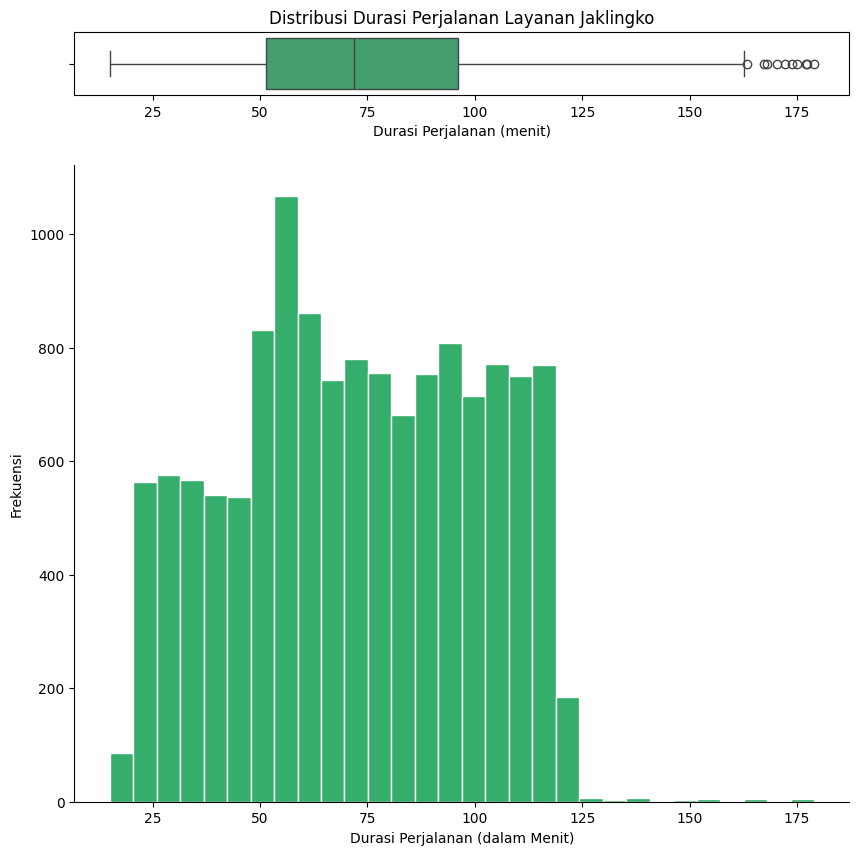

In [78]:
# Membuat Histogram sebaran Durasi Perjalanan dari Jaklingko
fig, (ax_top, ax_bot) = plt.subplots(2, 1, figsize=(10,10), gridspec_kw={'height_ratios': [0.1, 1]})
sns.boxplot(x=jkl['Durasi Perjalanan (menit)'], ax=ax_top, color='#35AD6B')
ax_top.set(
    title='Distribusi Durasi Perjalanan Layanan Jaklingko',
)
ax_bot.hist(jkl['Durasi Perjalanan (menit)'], bins=30, color='#35AD6B', edgecolor='white')
ax_bot.set(
    xlabel = 'Durasi Perjalanan (dalam Menit)',
    ylabel = 'Frekuensi'
)
despine(ax_bot)
plt.show()

Grafik diatas menampilkan distribusi durasi perjalanan dari layanan Transjakarta: Jaklingko. Setelah diuji normalitas baik dari seluruh dataset atau hanya layanan Jaklingko saja, durasi perjalanan tidak berdistribusi normal, hal ini ditandi dengan adanya outlier dan plot histogram yang terlihat _right skewed_.

Ditarik kesimpulan pada pembahasan sebelumnya kepadatan suatu koridor dilihat dari jumlah penumpang maksimal dan kapasitas layanann pada koridor tersebut. Layanan Jaklingko yang paling mencolok daripada koridor lain karena kapasitasnya hanya sekitar 9-11 penumpang. Jika dilihat dari grafik distribusi di atas, yang terlihat sedikit mencolok adalah pada rentang durasi 50 menit sampai 60 menit dengan frekuensi yang paling tinggi, sehingga akan dilakukan observasi jumlah penumpang dengan rentang waktu tersebut.

In [79]:
jkl_maks = jkl[(jkl['Durasi Perjalanan (menit)']>50) & (jkl['Durasi Perjalanan (menit)']<60)].groupby('CorridorID').agg(
    Frekuensi = ('Name', 'nunique')
).sort_values('Frekuensi', ascending=False)
jkl_maks = jkl_maks[jkl_maks['Frekuensi']>6] # Kondisi paling cukup padat
jkl_maks.head()

,Frekuensi
CorridorID,
JAK.42,10
JAK.58,10
JAK.19,10
JAK.60,9
JAK.18,9


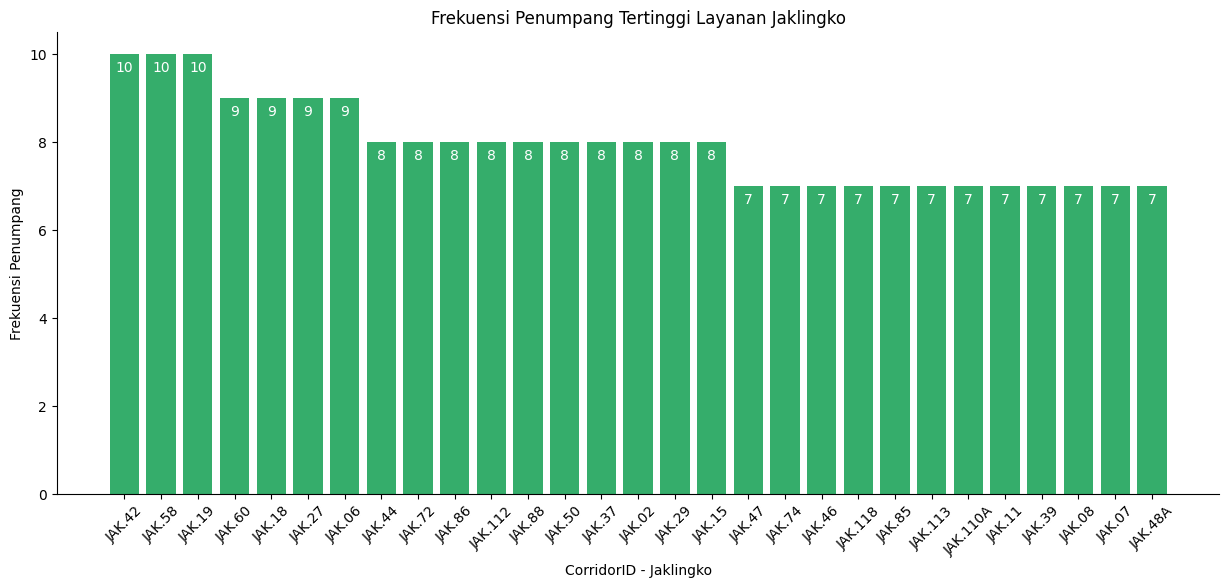

In [80]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(jkl_maks.index, jkl_maks['Frekuensi'], color='#35AD6B')
ax.set(
    xlabel='CorridorID - Jaklingko',
    ylabel='Frekuensi Penumpang',
    title='Frekuensi Penumpang Tertinggi Layanan Jaklingko'
)

for bar in ax.patches:
    ax.text(
        bar.get_x() + (bar.get_width()/2),      # Mengatur posisi x
        bar.get_y() + bar.get_height() - 0.4,    # Mengatur posisi y
        f'{bar.get_height():,.0f}',             # teks yang ditampilkan
        color='white',                          # mengatur warna
        fontsize=10,                            # mengatur ukuran huruf
        ha='center',
    )

plt.xticks(rotation=45)

despine(ax)

plt.show()

Layanan Transjakarta Jaklingko pada grafik di atas adalah rute yang paling banyak digunakan penumpang. Walaupun ada faktor lain yang tidak bisa didapat dari dataset Transjakarta ini, seperti jumlah armada, tetapi koridor-koridor di atas adalah koridor yang berpotensi untuk terjadinya tingkat kepadatan tinggi atau mengalami peningkatan jumlah penumpang dilihat dari jumlah penumpang maksimal yang hampir mencapai kapasitas layanannya (9-11 penumpang). Beberapa __Rekomendasi__ yang bisa diberikan sebagai berikut.
- Meningkatkan jumlah armada pada koridor yang paling banyak digunakan untuk mengurangi kepadatan.
- Meningkatkan infrastruktur dan fasilitas pada koridor dengan frekuensi rendah untuk menarik lebih banyak penumpang.

##### C. Halte (_Tap-in_ dan _Tap-Out_)

Dari ringkasan statistik didapat halte TapIn terbanyak berada pada halte Penjaringan (`P00170`) dan halte TapOut terbanyak berada pada halte BKN (`P00016`). Selanjutnya dicari halte mana saja yang paling padat. Karena jumlahnya yang cukup banyak (>2000) maka diambil 10 halte dengan frekuensi tertinggi.

In [81]:
tapin_counts = df['TapIn_Name'].value_counts().to_frame().head(10)
tapout_counts = df['TapOut_Name'].value_counts().to_frame().head(10)
display(tapin_counts, tapout_counts)

,count
TapIn_Name,
Penjaringan,235
Garuda Taman Mini,202
BKN,163
BNN LRT,150
Pejaten,146
Penggilingan,129
Cibubur Junction,126
Rusun Kapuk Muara,125
Seskoal,123


,count
TapOut_Name,
BKN,315
Penjaringan,265
Term. Senen,196
Monas,167
Term. Kampung Rambutan,164
Kejaksaan Agung,159
Ragunan,150
Pinang Ranti,145
Kota Kasablanka,131


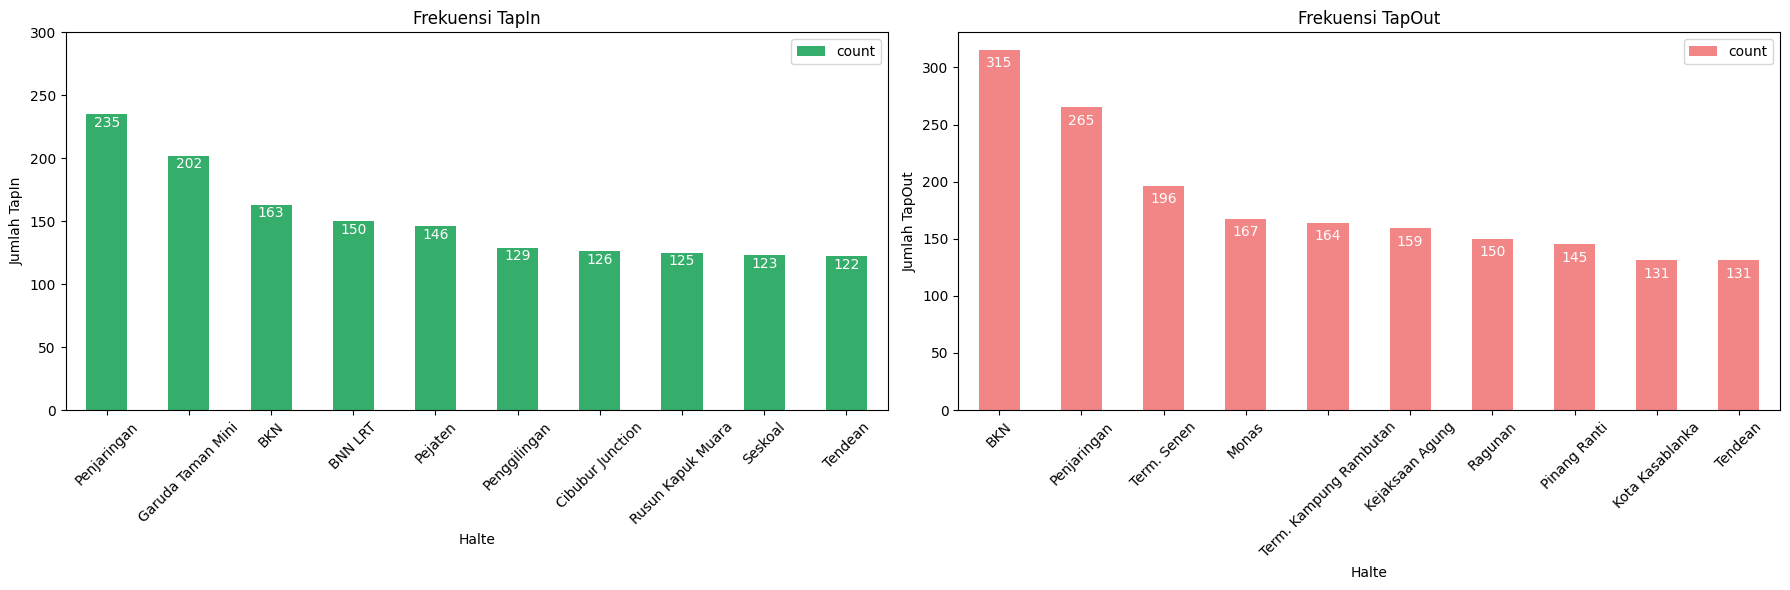

In [82]:
# Membuat figure
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot Halte TapIn terbanyak
tapin_counts.plot(kind='bar', ax=axes[0], color='#35AD6B')
axes[0].set_xticklabels(tapin_counts.index, rotation=45)
axes[0].set_ylim(0, 300)
axes[0].set(
    title='Frekuensi TapIn',
    xlabel='Halte',
    ylabel='Jumlah TapIn'
)

for bar in axes[0].patches:
    axes[0].text(
        bar.get_x() + (bar.get_width()/2),      # Mengatur posisi x
        bar.get_y() + bar.get_height() - 10,    # Mengatur posisi y
        f'{bar.get_height():,.0f}',             # teks yang ditampilkan
        color='white',                          # mengatur warna
        fontsize=10,                            # mengatur ukuran huruf
        ha='center',
    )

tapout_counts.plot(kind='bar', ax=axes[1], color='#F28585')
axes[1].set_xticklabels(tapout_counts.index, rotation=45)
axes[1].set(
    title='Frekuensi TapOut',
    xlabel='Halte',
    ylabel='Jumlah TapOut'
)

for bar in axes[1].patches:
    axes[1].text(
        bar.get_x() + (bar.get_width()/2),      # Mengatur posisi x
        bar.get_y() + bar.get_height() - 15,    # Mengatur posisi y
        f'{bar.get_height():,.0f}',             # teks yang ditampilkan
        color='white',                          # mengatur warna
        fontsize=10,                            # mengatur ukuran huruf
        ha='center',
    )

plt.tight_layout()
plt.show()

In [83]:
irisan_halte = set(tapin_counts.index).intersection(set(tapout_counts.index))
irisan_halte

{'BKN', 'Penjaringan', 'Tendean'}

In [84]:
list_irisan_halte = list(irisan_halte)

total = []
for halte in irisan_halte:
    jumlah = tapin_counts.loc[halte][0] + tapout_counts.loc[halte][0]
    total.append(jumlah)

pd.DataFrame({
    'Halte':list_irisan_halte,
    'Total':total
}).sort_values('Total', ascending=False)

,Halte,Total
2,Penjaringan,500
0,BKN,478
1,Tendean,253


Dari grafik dan tabel di atas dapat ditarik kesimpulan sebagai berikut.
- Halte yang penumpangnya paling sering memulai perjalanan mereka adalah Penjaringan. Artinya halte ini adalah wilayah halte dengan populasi tinggi.
- Halte yang penumpangnya paling sering mengakhiri perjalanan mereka adalah BKN. Artinya halte ini adalah wilayah halte dengan pusat kegiatan atau pusat aktivitas ekonomi di Jakarta.
- Halte yang paling padat adalah Penjaringan dan diikuti oleh BKN.
- Terdapat perbedaan jumlah frekuensi TapIn (163) dan TapOut (315) yang cukup tinggi pada halte BKN, artinya ada indikasi masalah seperti kurangnya aksesibilitas atau kesenjangan dalam layanan transportasi di daerah tersebut. Penumpang mungkin tidak menyadari ada pilihan layanan lain atau rute alternatif yang tersedia dari halte tersebut.

__Rekomendasi__ yang bisa diberikan adalah sebagai berikut.
- Dari kesimpulan di atas maka dapat dioptimalkan rute dan jadwal yang melewati halte Penjaringan dan BKN untuk memastikan bahwa armada yang cukup sering beroperasi di rute-rute yang paling sibuk.
- Ada kemungkinan bagi kedua halte dengan aktivitas yang tinggi tersebut membutuhkan peningkatan infrastruktur, seperti perluasan area tunggu, peningkatan fasilitas, atau bahkan penambahan jalur kendaraan.
- Tingkatkan aksesibilitas ke dan/atau dari halte BKN dengan menyediakan lebih banyak rute atau layanan antar-jemput yang menghubungkan halte BKN dengan area-area lain. Perbedaan besar dalam frekuensi TapIn dan TapOut di halte BKN bisa menunjukkan bahwa jadwal dan frekuensi armada saat ini tidak sesuai dengan kebutuhan penumpang.
- Halte dengan jumlah TapOut yang tinggi mungkin memerlukan fasilitas tambahan untuk menampung jumlah penumpang yang besar.
- Tingkatkan komunikasi dan informasi melalui papan informasi, aplikasi seluler, dan staf di lapangan untuk membantu penumpang menemukan rute terbaik dan memanfaatkan layanan transportasi secara efisien.

---

### __3. Analisis Penumpang__

##### A. Usia Penumpang

Berikut ini adalah gambaran umum dari dataset `Transjakarta(clean).csv`. Dibuat sebuah kolom baru bernama `Age` untuk mendapatkan nilai umur dari customer.

In [85]:
df['Age'] = df['Date'].dt.year - df['BirthYear']
df.head()

,CardID,PayCardBank,Name,Gender,BirthYear,CorridorID,CorridorName,Direction,Date,Tanggal,TapIn_ID,TapIn_Name,TapIn_Lat,TapIn_Lon,TapIn_Seq,TapIn_Time,TapOut_ID,TapOut_Name,TapOut_Lat,TapOut_Lon,TapOut_Seq,TapOut_Time,Durasi Perjalanan (menit),PayAmount,Age
0,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,2023-04-03,3,P00142,Pal Putih,-6.184631,106.84402,7,05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,06:00:53,39.15,3500,15
1,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,2023-04-03,3,B01963P,Kemenkes 2,-6.228700,106.83302,13,05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,06:40:01,57.28,3500,26
2,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,2023-04-03,3,B00499P,Gg. Kunir II,-6.133132,106.81435,38,05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,06:50:55,51.82,3500,31
3,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,2023-04-03,3,B05587P,Taman Elok 1,-6.195743,106.93526,23,05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,06:28:16,43.42,3500,45
4,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,2023-04-03,3,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,06:57:03,39.47,3500,41


In [86]:
# Daftar nama customer
name = df['Name'].unique()

# Membuat dictionary pasangan Nama dan Umur
dict_umur = df.groupby('Name')['Age'].unique().apply(lambda x: x[0]).to_dict()

# Membuat Dataframe dari dictionary
df_umur = pd.DataFrame(list(dict_umur.items()), columns=['Name', 'Age'])
df_umur.head()

,Name,Age
0,Abyasa Haryanti,75
1,Ade Astuti,19
2,Ade Halimah,41
3,Ade Suryono,28
4,Ade Waluyo,19


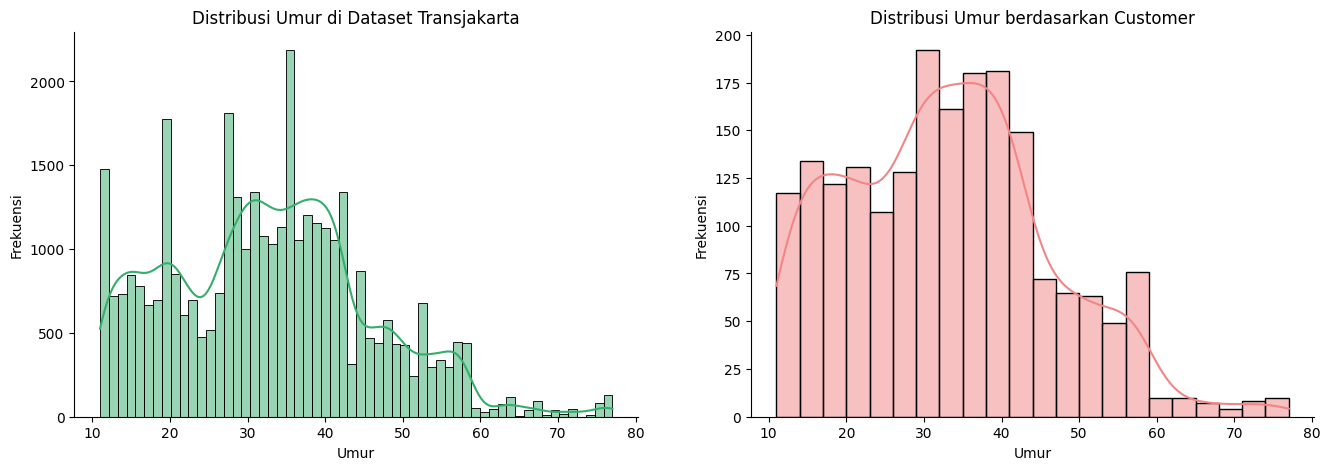

In [87]:
# Membuat plot
fig, (ax_left, ax_right) = plt.subplots(1, 2, figsize=(16, 5))

# Plot histogram Transjakarta
sns.histplot(data=df['Age'], kde=True, color='#35AD6B', ax=ax_left)
ax_left.set(
    title='Distribusi Umur di Dataset Transjakarta',
    xlabel='Umur',
    ylabel='Frekuensi'
)
despine(ax_left)

sns.histplot(data=df_umur['Age'], kde=True, color='#F28585', ax=ax_right)
ax_right.set(
    title='Distribusi Umur berdasarkan Customer',
    xlabel='Umur',
    ylabel='Frekuensi'
)
despine(ax_right)

# Menampilkan plot
plt.show()

In [88]:
from scipy.stats import normaltest

stat, pvalue = normaltest(df['Age'])

alpha = 0.05

if pvalue > alpha:
    print(f'pvalue = {pvalue:.5f}. pvalue > {alpha}. Fail to Reject Ho. Kita mengasumsikan bahwa data terdistribusi normal')
else:
    print(f'pvalue = {pvalue:.5f}. pvalue <= {alpha}. Reject Ho. Kita mengasumsikan bahwa data TIDAK terdistribusi normal')

pvalue = 0.00000. pvalue <= 0.05. Reject Ho. Kita mengasumsikan bahwa data TIDAK terdistribusi normal


Dari grafik di atas sudah terlihat bahwa distribusi datanya tidak berdistribusi normal. Namun untuk memastikannya dilakukan uji normalitas menggunakan metode `normaltest` (D'Agostino & Pearson Test) dan terbukti nilai p-value lebih kecil dibandingkan nilai alphanya (0.05, tingkat kepercayaan 95%) yang artinya ada cukup bukti untuk mengatakan distribusi umur tidak berdistribusi normal (_Reject_ Ho).

Dari distribusi di atas terlihat bahwa penumpang yang paling banyak menggunakan layanan Transjakarta adalah orang-orang yang berumur 30-40 tahun. Namun masih ada penumpang yang berumur lebih dari 60 tahun walaupun nilainya sedikit. Disamping umur yang dikategorikan lansia, terdapat regulasi yang mengatakan bahwa ada 8 kategori penerima kartu layanan gratis diantaranya: Lanjut usia (lansia 60 tahun ke atas). Seharusnya dengan adanya regulasi tersebut, komposisi penumpang lanjut usia setidaknya lebih banyak. Walaupun begitu jumlahnya terlampau kecil dibandingkan dengan usia penumpang lain sehingga perlu dilakukan penelusuran lebih lanjut.

Pertama, bagi dulu customer berdasarkan kategori usianya, selanjutanya dihitung jumlah setiap kategori berdasarkan biaya yang dikeluarkan untuk layanan Transjakarta. Setelah itu tampilkan dalah grafik untuk dianalisis.

In [89]:
# Membuat dan membagi kategori Usia
kondisi = [
    (df['Age'] < 18),
    (df['Age'] >= 18) & (df['Age'] < 60),
    (df['Age'] >= 60)
]
choices = ['Remaja', 'Dewasa', 'Lansia']

df['Kategori Usia'] = np.select(kondisi, choices)


# Menghitung jumlah penumpang berdasarkan biaya dan kategori usia
biaya_usia = df.pivot_table(
    values='Age',
    index=['PayAmount', 'Kategori Usia'],
    aggfunc='count').reset_index()

biaya_usia.columns = ['PayAmount', 'Kategori Usia', 'Jumlah']
display(biaya_usia, df.head())

,PayAmount,Kategori Usia,Jumlah
0,0,Dewasa,14210
1,0,Lansia,195
2,0,Remaja,2004
3,3500,Dewasa,14922
4,3500,Lansia,548
5,3500,Remaja,2910
6,20000,Dewasa,1376
7,20000,Lansia,3
8,20000,Remaja,304


,CardID,PayCardBank,Name,Gender,BirthYear,CorridorID,CorridorName,Direction,Date,Tanggal,TapIn_ID,TapIn_Name,TapIn_Lat,TapIn_Lon,TapIn_Seq,TapIn_Time,TapOut_ID,TapOut_Name,TapOut_Lat,TapOut_Lon,TapOut_Seq,TapOut_Time,Durasi Perjalanan (menit),PayAmount,Age,Kategori Usia
0,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,2023-04-03,3,P00142,Pal Putih,-6.184631,106.84402,7,05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,06:00:53,39.15,3500,15,Remaja
1,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,2023-04-03,3,B01963P,Kemenkes 2,-6.228700,106.83302,13,05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,06:40:01,57.28,3500,26,Dewasa
2,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,2023-04-03,3,B00499P,Gg. Kunir II,-6.133132,106.81435,38,05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,06:50:55,51.82,3500,31,Dewasa
3,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,2023-04-03,3,B05587P,Taman Elok 1,-6.195743,106.93526,23,05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,06:28:16,43.42,3500,45,Dewasa
4,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,2023-04-03,3,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,06:57:03,39.47,3500,41,Dewasa


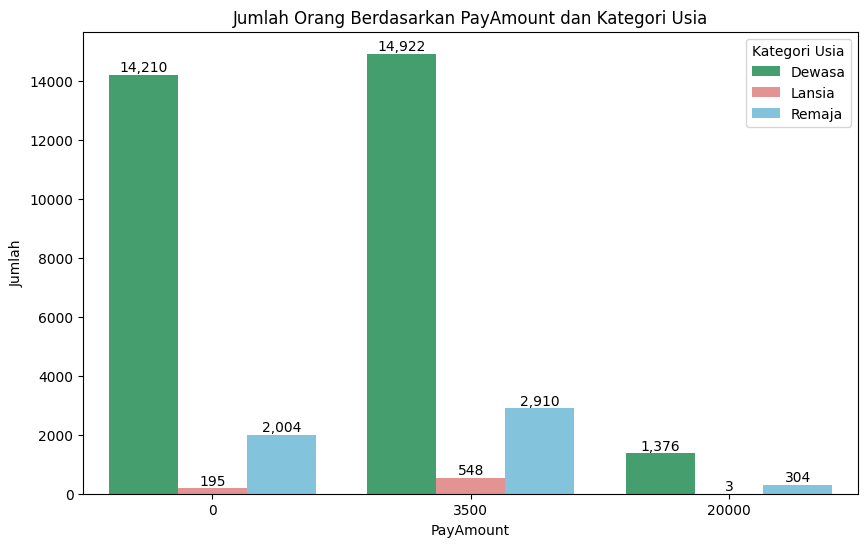

In [90]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    data=biaya_usia,
    x='PayAmount',
    y='Jumlah',
    palette={'Dewasa': '#35AD6B', 'Lansia': '#F28585', 'Remaja': '#74CBEB'},
    hue='Kategori Usia',
    ax=ax
)

ax.set(
    title ='Jumlah Orang Berdasarkan PayAmount dan Kategori Usia',
    xlabel = 'PayAmount',
    ylabel = 'Jumlah')

ax.legend(title='Kategori Usia')

for bar in ax.patches[:9]:
    ax.text(
        bar.get_x() + (bar.get_width()/2),      # Mengatur posisi x
        bar.get_y() + bar.get_height() + 100,   # Mengatur posisi y
        f'{bar.get_height():,.0f}',             # teks yang ditampilkan
        color='black',                          # mengatur warna
        fontsize=10,                            # mengatur ukuran huruf
        ha='center',
    )

plt.show()

Bila dilihat komposisi penumpang berdasarkan kategori usia di atas, komposisi penumpang Dewasa dominan terhadap kategori lain. Hal tersebut dirasa wajar karena penumpang dewasa kebanyakan berpergian pagi dan malam untuk bekerja. Dan benar saja komposisi penumpang lansia terlampau rendah dibanding penumpang dewasa, walaupun terdapat regulasi yang mengatakan bahwa penumpang lansia merupakan salah satu dari kategori penerima kartu layanan gratis. Jika dilihat dari grafik di atas penumpang lansia lebih banyak bukan di kategori layanan gratis melainkan di kategori biaya Rp3.500.

In [91]:
# nilai unik kolom PayAmount
biaya = df['PayAmount'].unique()
biaya.sort()

# CorridorID (Rute) 
lansia = []
for amount in biaya:
    lansia.append(df[(df['Kategori Usia']=='Lansia') & (df['PayAmount']==amount)]['CorridorID'].unique())

In [92]:
pd.set_option('display.max_colwidth', None)
pd.DataFrame({
    'PayAmount': biaya,
    'CorridorID': lansia
})

,PayAmount,CorridorID
0,0,"[JAK.49, JAK.07, JAK.32, JAK.42, JAK.110A, JAK.10, JAK.115, 2E, JAK.106, JAK.12, 3B, JAK.112, BW9, JAK.34, JAK.20, JAK.25, 12C, JAK.99, 11P, 11C, JAK.56, JAK.19, JAK.48A, JAK.84, JAK.46, JAK.02, 3C, JAK.13, JAK.45, JAK.28, JAK.04, JAK.15, JAK.21, JAK.23, JAK.77, JAK.41, JAK.18, JAK.31, JAK.16]"
1,3500,"[M1, 10D, 6V, 7Q, 6Q, M7, 10K, 8C, 6N, 7C, 9A, 2B, M2, 5N, 1N, 1R, 10, 6M, M1H, 1M, 1B, 9H, M8, 9E, 8D, 1, M11, L13E, 6, D11, 3, 9N, 7A, 5B, S22, 6B, M13, JIS3, 1H, M6, 8A, M12, M7B]"
2,20000,"[6P, S12]"


Untuk yang membayar sebesar Rp20.000 layanan Transjakarta, `CorridorID` yang digunakan adalah `6P` dan `S12`. Berdasarkan website resmi Transjakarta, jalur tersebut merupakan jalur yang dilalui oleh Royaltrans. Royaltrans adalah layanan bus dari Transjakarta dengan tarif premium. Layanan ini dilengkapi dengan fasilitas premium seperti tempat duduk dengan busa yang lebar, reclining seat, USB port di setiap kursi, dan 12 camera CCTV yang memantau setiap area di dalam dan di luar bus. Layanan ini cocok untuk `preferensi orang-orang yang membutuhkan kenyamanan lebih`. Jumlah penumpang lansia yang menggunakan layanan ini hanya 3, dan ini hal yang wajar.

Jika dilihat dari rute `CorridorID` yang ditumpangi oleh penumpang lansia pada biaya yang gratis secara garis besar menggunakan rute yang diawali `JAK...` (mikrotrans) yang memang seharusnya gratis. 

Yang menjadi perhatian disini adalah penumpang lansia yang membayar jasa layanan Transjakarta sebesar Rp3.500. Walaupun biayanya relatif murah, namun rasanya tidak cocok jika dilihat dari regulasi yang ada. Sebagai Badan Usaha Milik Daerah (BUMD) yang memegang amanat Pemerintah Provinsi DKI Jakarta dalam mengelola moda transportasi Transjakarta, Perusahaan berkomitmen untuk menerapkan keseimbangan dalam kegiatan operasi dan bisnisnya dan meningkatkan kepuasan penggunanya, khususnya pada penyelenggaraan pengelolaan moda transportasi Transjakarta.
> Kenapa hal ini bisa terjadi? apa yang menyebabkan penumpang lansia ini diharuskan membayar layanan? strategi apa yang cocok untuk kondisi ini?

Setelah dicek ke website resmi [Transjakarta](https://transjakarta.co.id/pendaftaran-kartu-layanan-gratis-transjakarta-tj-card/), untuk mendapatkan 'Kartu Layanan Gratis' penumpang hanya bisa melalui pendaftaran _online_. Walaupun terlihat mudah tetapi strategi ini tidak cocok karena sebagian besar lansia tidak mengerti cara melakukan pendaftarannya, dilihat dari jumlah yang membayar layanan transjakarta lebih banyak di kategori membayar dibandingkan yang gratis.

__Rekomendasi__ untuk mengoptimalkan layanan yang bisa dilakukan adalah membuat jalur pendaftaran secara _offline_ dan publikasi (bisa berupa poster, pengumuman/notifikasi, dll.) di halte-halte pemberhentian yang banyak dilalui penumpang lansia.

##### B. Gender Penumpang

Untuk melihat karakteristik penumpang berdasarkan gender, akan dihitung terlebih dahulu proporsi dan jumlah penumpang berdasarkan gender sebagai berikut.

In [93]:
gender = df['Gender'].value_counts()
gender

Gender
F    19416
M    17056
Name: count, dtype: int64

In [94]:
gender_prop = df['Gender'].value_counts(normalize=True)
gender_prop

Gender
F    0.532354
M    0.467646
Name: proportion, dtype: float64

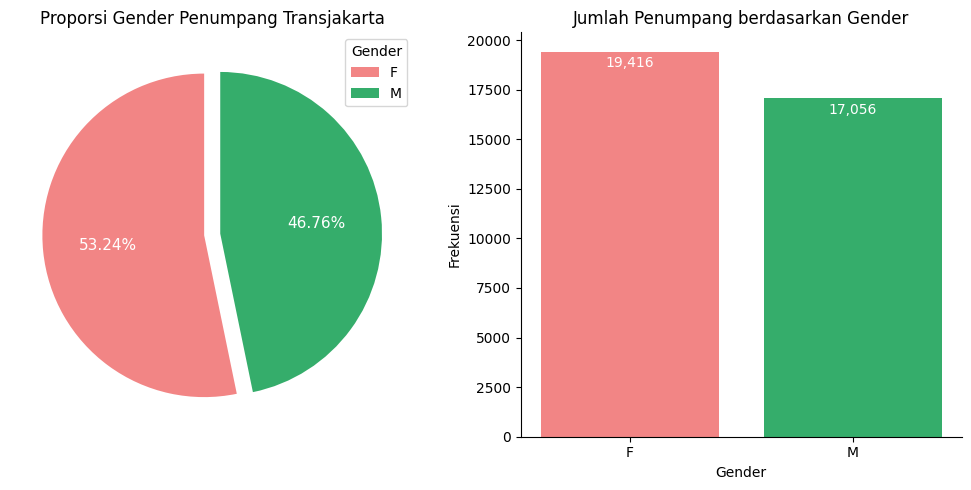

In [95]:
# Membuat plot
fig, (ax_left, ax_right) = plt.subplots(1, 2, figsize=(10, 5))

# Membuat Pie Chart Gender dari dataset Transjakarta
ax_left.pie(
    gender,
    labels=gender.index,
    autopct='%1.2f%%',
    startangle=90,
    colors = ['#F28585', '#35AD6B'],
    explode=[0.05, 0.05],
    textprops={'color': 'white', 'fontsize': 11}
)
ax_left.legend(title='Gender')

# Mengatur Judul PieChart
ax_left.set_title('Proporsi Gender Penumpang Transjakarta')

# Membuat Bar chart Gender
ax_right.bar(
    gender.index,
    gender.values,
    color = ['#F28585', '#35AD6B'],
)

# Memberi anotasi di barplot
for bar in ax_right.patches:
    ax_right.text(
        bar.get_x() + (bar.get_width()/2),      # Mengatur posisi x
        bar.get_y() + bar.get_height() - 800,   # Mengatur posisi y
        f'{bar.get_height():,.0f}',             # teks yang ditampilkan
        color='white',                          # mengatur warna
        fontsize=10,                            # mengatur ukuran huruf
        ha='center',
    )

# Mengatur judul di barplot
ax_right.set(
    title='Jumlah Penumpang berdasarkan Gender',
    xlabel='Gender',
    ylabel='Frekuensi'
)
despine(ax_right)

plt.tight_layout()

plt.show()

Dari grafik tersebut terlihat proporsi/jumlah wanita lebih banyak daripada pria dengan perbedaan yang tidak terlalu besar. Selanjutnya dicek apakah ada keterkaitan antara variabel gender dengan kategori pembayaran. Observasi ini dilakukan untuk melihat preferensi layanan apa yang digunakan oleh para penumpang, karena kategori pembayaran secara garis besar mengacu pada setiap layanan Transjakarta. Untuk menguji apakah ada keterkaitan yang signifikan antara gender dengan kategori pembayaran.

In [96]:
gender_payamount_ct = pd.crosstab(df['Gender'], df['PayAmount'])
gender_payamount_ct

PayAmount,0,3500,20000
Gender,,,
F,8951,9555,910
M,7458,8825,773


In [97]:
from scipy.stats import chi2_contingency

# Menentukan tingkat kepercayaan
alpha = 0.05

# Melakukan uji chi-square
chi2, p, dof, expected = chi2_contingency(gender_payamount_ct)

# Menampilkan hasil uji chi-square
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value             : {p}")
if p < alpha:
    print('Tolak Ho. Gender dan PayAmount terkait/dependant (proporsinya berbeda signifikan)')

Chi-Square Statistic: 23.377609495555156
P-value             : 8.387192250564141e-06
Tolak Ho. Gender dan PayAmount terkait/dependant (proporsinya berbeda signifikan)


Terdapat cukup bukti untuk mengatakan bahwa Gender dan PayAmount ada keterkaitan. Agar lebih jelas dibuat visualisasinya sebagai berikut.

In [98]:
gender_payamount_melt = gender_payamount_ct.reset_index().melt(id_vars='Gender', var_name='PayAmount', value_name='Count')
gender_payamount_melt

,Gender,PayAmount,Count
0,F,0,8951
1,M,0,7458
2,F,3500,9555
3,M,3500,8825
4,F,20000,910
5,M,20000,773


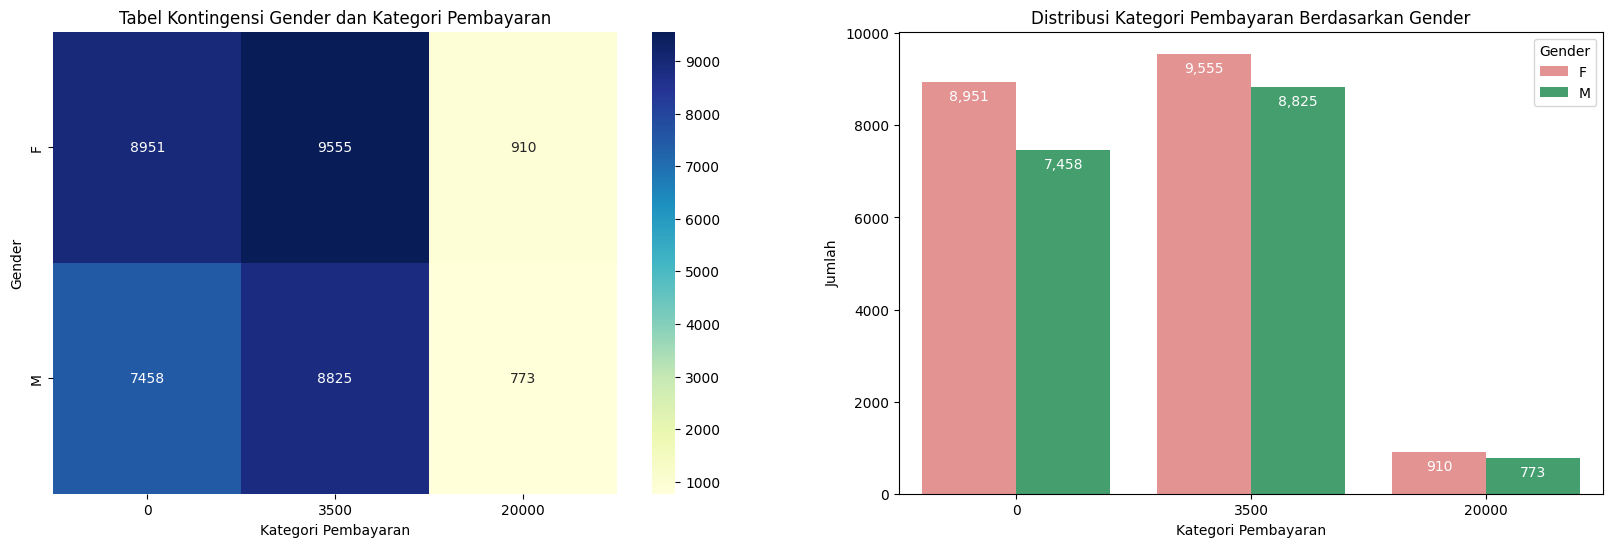

In [99]:
# Visualisasi tabel kontingensi
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Membuat Heatmap
sns.heatmap(
    gender_payamount_ct,
    annot=True,
    cmap="YlGnBu",
    fmt='d',
    ax=axes[0]
)

#Label di Heatmap
axes[0].set(
    title='Tabel Kontingensi Gender dan Kategori Pembayaran',
    xlabel='Kategori Pembayaran',
    ylabel='Gender'
)

# ---------------------------------------------------------------------------

# Membuat Barplot
sns.barplot(
    data=gender_payamount_melt,
    x='PayAmount',
    y='Count',
    hue='Gender',
    palette=['#F28585', '#35AD6B'],
    ax=axes[1]
)

# Label di Barplot
axes[1].set(
    title='Distribusi Kategori Pembayaran Berdasarkan Gender',
    xlabel='Kategori Pembayaran',
    ylabel='Jumlah'
)

# Anotasi Barplot
for bar in axes[1].patches[:6]:
    axes[1].text(
        bar.get_x() + (bar.get_width()/2),      # Mengatur posisi x
        bar.get_y() + bar.get_height()-400,   # Mengatur posisi y
        f'{bar.get_height():,.0f}',             # teks yang ditampilkan
        color='white',                          # mengatur warna
        fontsize=10,                            # mengatur ukuran huruf
        ha='center',
    )
despine(ax)

axes[1].legend(title='Gender')

plt.show()

Dari grafik di atas telihat bahwa baik dari wanita dan pria cenderung lebih memilih layanan selain Royaltrans (tarif Rrp20.000). Salah satu hal yang mendasari mereka cenderung memilih layanan selain Royaltrans adalah tarif yang perlu dibayarkan. Royaltrans diperuntukan bagi orang-orang yang lebih memilih kenyamanan. Tetapi masih ada faktor lain yang membuat penumpang lebih tidak memilih layanan ini, apa yang membuat penumpang tidak memilih Royaltrans?. Maka diperlukan observasi dengan faktor lain, salah satunya yaitu observasi berdasarkan durasi perjalanan antar layanan.

In [100]:
median_durasi_by_payamount = df.groupby('PayAmount')['Durasi Perjalanan (menit)'].median().to_frame()
median_durasi_by_payamount

,Durasi Perjalanan (menit)
PayAmount,
0,71.950
3500,71.475
20000,74.980


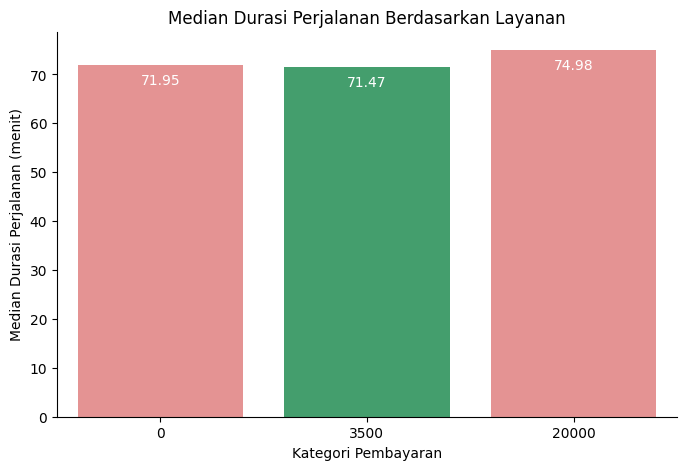

In [101]:
# Visualisasi tabel kontingensi
fig, ax = plt.subplots(figsize=(8, 5))

# Membuat Barplot
sns.barplot(
    data=median_durasi_by_payamount,
    x=median_durasi_by_payamount.index,
    y=median_durasi_by_payamount['Durasi Perjalanan (menit)'],
    palette=['#F28585', '#35AD6B'],
    ax=ax
)

# Label di Barplot
ax.set(
    title='Median Durasi Perjalanan Berdasarkan Layanan',
    xlabel='Kategori Pembayaran',
    ylabel='Median Durasi Perjalanan (menit)'
)

for bar in ax.patches:
    ax.text(
        bar.get_x() + (bar.get_width()/2),      # Mengatur posisi x
        bar.get_y() + bar.get_height() - 4,     # Mengatur posisi y
        f'{bar.get_height():,.2f}',             # teks yang ditampilkan
        color='white',                          # mengatur warna
        fontsize=10,                            # mengatur ukuran huruf
        ha='center',
    )
despine(ax)

plt.show()

Secara kasar dari grafik dapat dilihat bahwa median durasi perjalan layanan Royaltrans (tarif Rp20.000) berbeda dengan layanan lain. Namun pembuktian secara statistik diperlukan untuk memastikan bahwa hipotesis tersebut benar.

- `H0`: Median Durasi perjalanan untuk setiap kelompok layanan adalah SAMA.
- `H1`: Minimal ada 1 kelompok yang berbeda median Durasi Perjalannya.

In [102]:
stat, pvalue = kruskal(
    df[df['PayAmount']==0]['Durasi Perjalanan (menit)'],
    df[df['PayAmount']==3500]['Durasi Perjalanan (menit)'],
    df[df['PayAmount']==20000]['Durasi Perjalanan (menit)']
)

alpha = 0.05 # Besarnya peluang salah (Menolak H0, padahal H0 itu benar)

if pvalue > alpha:
    print(f'''
          pvalue = {pvalue:.5f}. pvalue >= {alpha}
          Fail to Reject Ho.
          Tidak punya cukup bukti untuk mengatakan bahwa minimal ada 1 kelompok yang Median Durasi perjalanannya SAMA
          ''')
else:
    print(f'''
          pvalue = {pvalue:.5f}. pvalue <= {alpha}
          Reject Ho
          Punya cukup bukti untuk mengatakan bahwa minimal ada 1 kelompok yang Median Durasi perjalanannya SAMA
          ''')


          pvalue = 0.00043. pvalue <= 0.05
          Reject Ho
          Punya cukup bukti untuk mengatakan bahwa minimal ada 1 kelompok yang Median Durasi perjalanannya SAMA
          


Terbukti bahwa terdapat perbedaan minimal 1 kelompok layanan yang median durasinya berbeda, ini mengindikasikan bahwa layanan Royaltrans memiliki durasi perjalanan yang berbeda (lebih tinggi). Artinya selain tarif yang relatif lebih tinggi, durasi perjalanan layanan Royaltrans lebih lama, sehingga penumpang cenderung memilih layanan selain Royaltrans. Maka __Rekomendasi__ yang dapat diberikan bila ingin meningkatkan jumlah penumpang dan kepuasannya adalah menurunkan tarif layanan Royaltrans, bila memungkinkan, dan mengoptimalkan jalur/rute dari Royaltrans karena median durasinya lebih tinggi dibanding dengan layanan lain.

In [103]:
df.to_csv('Transjakarta (after Analysis).csv')

---

# ___Summary___

Untuk mengoptimalkan kinerja perusahaan BUMD Transjakarta dilakukan analisis data penumpang dan rute perjalanan sehingga didapat beberapa kesimpulan berbasis data yang dapat dijadikan patokan _stakeholder_ dalam menentukan (_decision making_) strategi bisnis yang tepat. Berikut Kesimpulan yang didapat dari hasil analisis karakteristik penumpang dan kinerja rute.

1. Rute yang paling banyak digunakan adalah `1T`: Cibubur - Balai Kota dan `S21`: Ciputat - CSW, sementara Rute yang paling sedikit digunakan adalah `7B`: Kampung Rambutan - Blok M dan `M5`: Matraman Baru - Ancol (M5);
2. Rute yang paling banyak/padat penumpang adalah `JAK.42`: Kampung Melayu - Pondok Kelapa, `JAK.58`: Cilincing - Rorotan, dan `JAK.19`: Pinang Ranti - Kampung Rambutan;
3. Halte paling adalah __Penjaringan__ dan __BKN__, mengindikasikan wilayah populasi yang paling padat di Jakarta dan pusat aktivitas ekonomi di Jakarta;
4. Terdapat perbedaan jumlah TapIn (163) dan TapOut (315) yang cukup tinggi pada Halte BKN, artinya terdapat indikasi kurangnya aksesibilitas atau kesenjangan dalam layanan transportasi di daerah tersebut. Perbedaan besar dalam frekuensi TapIn dan TapOut di halte BKN bisa menunjukkan bahwa jadwal dan frekuensi armada saat ini tidak sesuai dengan kebutuhan penumpang.;
5. Kategori usia lansia cenderung memilih layanan dengan tarif Rp3.500, tidak menggunakan Kartu Layanan Gratis;
6. Proporsi jenis kelamin wanita (53,24%) lebih banyak ±6.48% daripada pria (46,76%);
7. Ada keterkaitan antara _Gender_ dan _PayAmount_: penumpang cenderung tidak memilih layanan Royaltrans;
8. Selain tarif yang lebih tinggi, Median durasi perjalanan Royaltrans lebih tinggi (lama).

---

# __Rekomendasi__

Dari ringkasan sebelumnya, dapat ditentukan strategi mana yang cocok bagi perusahaan untuk meningkatkan kinerja dan kepuasan penumpang. Berikut rekomendasi yang bisa dilakukan perusahaan di masa mendatang.

- Meningkatkan jumlah armada pada koridor yang paling banyak digunakan untuk mengurangi kepadatan dan menghindari overload.
- Meningkatkan infrastruktur dan fasilitas pada koridor dengan frekuensi rendah untuk menarik lebih banyak penumpang.
- Optimalkan rute dan jadwal yang melewati halte Penjaringan dan BKN untuk memastikan bahwa armada yang cukup sering beroperasi di rute-rute yang paling sibuk yang melewati halte tersebut.
- Peningkatan infrastruktur pada kedua halte, seperti perluasan area tunggu, peningkatan fasilitas, atau bahkan penambahan jalur kendaraan.
- Tingkatkan aksesibilitas ke dan/atau dari halte BKN dengan menyediakan lebih banyak rute atau layanan antar-jemput yang menghubungkan halte BKN dengan area-area lain.
- Halte dengan jumlah TapOut yang tinggi (BKN, Penjaringan, dan Term. Senen) mungkin memerlukan fasilitas tambahan untuk menampung jumlah penumpang yang besar. Diperlukan observasi langsung ke lapangan untuk melihat keadaan halte.
- Tingkatkan komunikasi dan informasi melalui papan informasi, aplikasi seluler, dan staf di lapangan untuk membantu penumpang menemukan rute terbaik dan memanfaatkan layanan transportasi secara efisien.
- Buat jalur pendaftaran secara _offline_ untuk Kartu Layanan Gratis bagi lansia. Publikasikan secara optimal (bisa berupa poster, pengumuman/notifikasi, staff di lapangan, dll.) di halte-halte pemberhentian yang banyak dilalui penumpang lansia.
- Karena proporsi penumpang lebih banyak wanita daripada pria maka optimalkan rancangan layanan yang lebih baik dan lebih aman bagi semua pengguna.
- Bila ingin meningkatkan jumlah penumpang dan kepuasannya adalah menurunkan tarif layanan Royaltrans, bila memungkinkan, dan mengoptimalkan jalur/rute dari Royaltrans karena median durasinya lebih tinggi dibanding dengan layanan lain.

---

# __Kesimpulan__

Dengan pengumpulan data histori setiap penumpang dan perjalanannya, tim operasional kantor dapat menganalisis karakteristik penumpang dan kinerja rute yang dilaluinya. Analisis dilakukan untuk mendapatkan _insight_ dari setiap variabel di dalam dataset untuk dijadikan patokan dalam memilih strategi bisnis yang cocok bagi perusahaan Transjakarta. _Stakeholder_ dapat menentukan arah perusahaannya ke jalan yang lebih baik dengan berbasis data.